<a href="https://colab.research.google.com/github/Allam0053/KK/blob/main/KK_tugas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [46]:
def my_template (model, x_train, y_train, x_test, y_test, model_name):
  model.fit(x_train, y_train)
  prediksi_model = model.predict(x_test)
  acc_model = accuracy_score(y_test, prediksi_model)
  pre_model = precision_score(y_test, prediksi_model, average='micro')
  rec_model = recall_score(y_test, prediksi_model, average='micro')
  f1_model = f1_score(y_test, prediksi_model, average='micro')
  print('Akurasi', model_name, ':', acc_model)
  my = {
      'model': model_name,
      'predict': prediksi_model,
      'akurasi': acc_model,
      'precision_score' : pre_model,
      'recall_score' : rec_model,
      'f1_score' : f1_model
  }
  return my

In [4]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx', index_col=0)

df.head()

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### SCALE / NORMALISASI

In [7]:
df_scaled = df.copy()

for column in df_scaled.columns:
    if (column == 'Class'):
        continue
    df_scaled[column] = df_scaled[column] / df_scaled[column].abs().max()

df_max_scaled.head()

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
28395,0.307394,0.281756,0.377856,0.492609,0.603246,0.109074,0.333947,0.881929,0.994147,0.967035,0.925104,0.701501,0.858748,0.855817,0.998991,SEKER
28734,0.321360,0.271397,0.397077,0.451530,0.451805,0.110810,0.335935,0.905072,0.990256,0.895374,0.966128,0.667740,0.972347,0.933403,0.998697,SEKER
29380,0.314355,0.288047,0.382294,0.497761,0.617416,0.112778,0.339690,0.898312,0.994854,0.956761,0.920461,0.693120,0.831584,0.847249,0.999333,SEKER
30008,0.325322,0.284977,0.396604,0.474688,0.547074,0.116705,0.343301,0.903586,0.981922,0.912435,0.940267,0.671382,0.877104,0.884103,0.994465,SEKER
30140,0.312352,0.273188,0.413472,0.436487,0.366108,0.115539,0.344056,0.892522,0.996196,0.994137,0.982997,0.640791,1.000000,0.966282,0.999433,SEKER


### SPLIT

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_max_scaled, test_size=0.2)

x_train = train_df.drop(columns=['Class'])
y_train = train_df['Class']

x_test = test_df.drop(columns=['Class'])
y_test = test_df['Class']


### SVM

In [50]:
from sklearn import svm

dSVM_ovo = svm.SVC(C=1.0, kernel='linear',
                   decision_function_shape='ovo')  # one versus one SVM

hasil['svm'] = my_template(dSVM_ovo, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, model_name='svm')

Akurasi svm : 0.9125964010282777


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

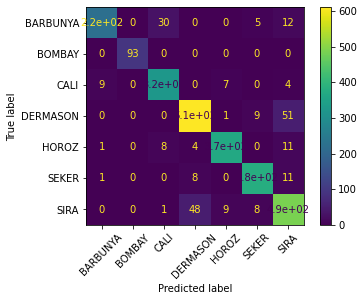

In [35]:
plot_confusion_matrix(dSVM_ovo, x_test, y_test)
plt.xticks(rotation=45)

### D-Tree

In [51]:
DT = tree.DecisionTreeClassifier(criterion='entropy')

hasil['dtree'] = my_template(DT, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, model_name='Decision Tree')

Akurasi Decision Tree : 0.8898273962541314


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

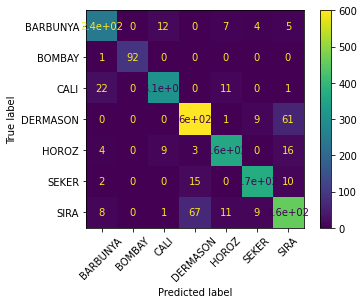

In [37]:
plot_confusion_matrix(DT, x_test, y_test)
plt.xticks(rotation=45)

### ANN

In [52]:
from sklearn.neural_network import MLPClassifier
# Create an instance of the classifier
mlp = MLPClassifier(random_state=42)

hasil['ann'] = my_template(mlp, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, model_name='MLP')

Akurasi MLP : 0.9159015791406537


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

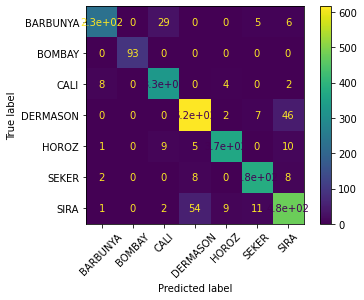

In [40]:
plot_confusion_matrix(mlp, x_test, y_test)
plt.xticks(rotation=45)

In [41]:
hasil['dtree']['model']

'Decision Tree'

In [55]:
from tabulate import tabulate

tb_headers = ['Akurasi', 'Presision', 'Recall', 'F1']
tb_index = [hasil['dtree']['model'], 
            hasil['svm']['model'], 
            hasil['ann']['model']]

tb_data = [
           [hasil['dtree']['akurasi'], hasil['dtree']['precision_score'], hasil['dtree']['recall_score'], hasil['dtree']['f1_score']],
           [hasil['svm']['akurasi'], hasil['svm']['precision_score'], hasil['svm']['recall_score'], hasil['svm']['f1_score']],
           [hasil['ann']['akurasi'], hasil['ann']['precision_score'], hasil['ann']['recall_score'], hasil['ann']['f1_score']],
]

print(tabulate(tb_data, headers=tb_headers,showindex=tb_index))


                 Akurasi    Presision    Recall        F1
-------------  ---------  -----------  --------  --------
Decision Tree   0.889827     0.889827  0.889827  0.889827
svm             0.912596     0.912596  0.912596  0.912596
MLP             0.915902     0.915902  0.915902  0.915902


### Kesimpulan
Pada kasus ini, hasil perbandingan antar metode klasifikasi D-Tree, SVM, dan MLP tidak memberikan jarak yang signifikan. Ketiga metode tersebut dapat mengklasifikasikan data Dry Bean dengan baik. Baik score akurasi, precision, recall, dan f1 cukup tinggi. Tetapi MLP mempunyai score paling tinggi, diikuti dengan SVM lalu D-Tree. Pada training model, MLP adalah yang paling lama. berdasarkan history dari running program yang ada di atas, MLP membutuhkan waktu 14 detik, SVM membutuhkan waktu 1 detik, dan D-Tree membutuhkan waktu antara 0 sampai 1 detik.